In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn import svm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
# load data
iris = load_iris()
X = iris.data
y = iris.target

X_trainvalidation, X_test, y_trainvalidation, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_trainvalidation.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [3]:
nb_trees = [5, 10, 50, 150, 200]
mx_depth = [3, 5, 10, None]

In [4]:
# Decision Tree
decision_tree_scores = []
for md in mx_depth:
    clf_decision = DecisionTreeClassifier(max_depth=md, random_state=42)
    temp_score = cross_val_score(clf_decision, X_trainvalidation, y_trainvalidation, cv=10)
    decision_tree_scores.append(np.average(temp_score))
    print(temp_score)

[0.91666667 1.         1.         1.         0.75       0.83333333
 1.         1.         0.91666667 0.91666667]
[0.91666667 1.         1.         1.         0.66666667 0.83333333
 1.         0.91666667 0.91666667 0.91666667]
[0.91666667 1.         1.         1.         0.66666667 0.83333333
 1.         0.91666667 1.         0.91666667]
[0.91666667 1.         1.         1.         0.66666667 0.83333333
 1.         0.91666667 1.         0.91666667]


In [5]:
decision_tree_scores

[0.9333333333333332,
 0.9166666666666666,
 0.9249999999999998,
 0.9249999999999998]

In [6]:
# best decision trees
best_dt = np.argmax(decision_tree_scores)
best_depth = mx_depth[best_dt]
print('The max depth:' + str(best_depth))
print('The mean accuracy:' + str(max(decision_tree_scores)))

The max depth:3
The mean accuracy:0.9333333333333332


Text(0, 0.5, 'Mean accuracy')

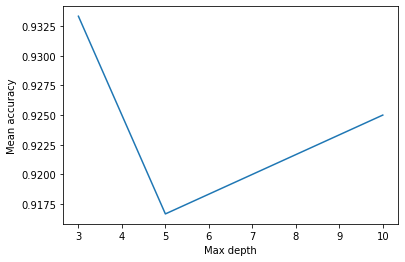

In [7]:
plt.plot(mx_depth, decision_tree_scores)
plt.xlabel('Max depth')
plt.ylabel('Mean accuracy')

Decision Tree: The max depth is 3. The mean accuracy is 0.93

In [8]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
random_forest_scores = []
for nt in nb_trees:
    for md in mx_depth:
        clf_decision = RandomForestClassifier(max_depth=md, n_estimators=nt, random_state=42)
        temp_score = cross_val_score(clf_decision, X_trainvalidation, y_trainvalidation, cv=10)
        random_forest_scores.append(np.average(temp_score))
        print(str(md) + ',' + str(nt) +',' + str(temp_score))

3,5,[1.         1.         1.         1.         0.75       0.91666667
 0.91666667 1.         1.         0.83333333]
5,5,[1.         1.         1.         1.         0.75       0.83333333
 0.91666667 1.         1.         0.91666667]
10,5,[1.         1.         1.         1.         0.75       0.83333333
 0.91666667 1.         1.         0.91666667]
None,5,[1.         1.         1.         1.         0.75       0.83333333
 0.91666667 1.         1.         0.91666667]
3,10,[1.         1.         1.         1.         0.66666667 0.91666667
 0.91666667 1.         1.         0.91666667]
5,10,[0.91666667 1.         1.         1.         0.66666667 0.83333333
 0.91666667 1.         1.         0.91666667]
10,10,[0.91666667 1.         1.         1.         0.66666667 0.83333333
 0.91666667 0.91666667 1.         0.91666667]
None,10,[0.91666667 1.         1.         1.         0.66666667 0.83333333
 0.91666667 0.91666667 1.         0.91666667]
3,50,[1.         1.         1.         1.         0.

In [9]:
random_forest_scores

[0.9416666666666667,
 0.9416666666666667,
 0.9416666666666667,
 0.9416666666666667,
 0.9416666666666667,
 0.9249999999999998,
 0.9166666666666666,
 0.9166666666666666,
 0.9499999999999998,
 0.9333333333333332,
 0.9333333333333332,
 0.9333333333333332,
 0.9416666666666667,
 0.9249999999999998,
 0.9249999999999998,
 0.9249999999999998,
 0.9416666666666667,
 0.9333333333333332,
 0.9333333333333332,
 0.9333333333333332]

In [10]:
RF = np.array(random_forest_scores).reshape(5,4)
RF

array([[0.94166667, 0.94166667, 0.94166667, 0.94166667],
       [0.94166667, 0.925     , 0.91666667, 0.91666667],
       [0.95      , 0.93333333, 0.93333333, 0.93333333],
       [0.94166667, 0.925     , 0.925     , 0.925     ],
       [0.94166667, 0.93333333, 0.93333333, 0.93333333]])

In [11]:
# best random forest
best_dt = np.argmax(random_forest_scores)
best_depth = mx_depth[int(best_dt%4)]
best_tree = nb_trees[int(best_dt/4)]
print('Depth:' + str(best_depth))
print('Tree:' + str(best_tree))

Depth:3
Tree:50


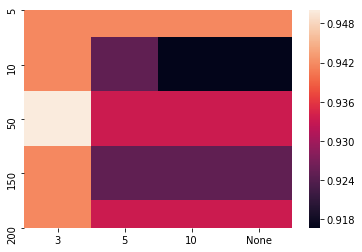

In [12]:
x_axis_labels = [3, 5, 10, 'None'] 
y_axis_labels = [5, 10, 50, 150, 200]
sns.heatmap(RF, xticklabels=x_axis_labels, yticklabels=y_axis_labels)

Random Forest: The best depth is 3. The best number of tree is 50.

In [13]:
#Gradient Tree Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
nb_estimators = [5, 10, 50, 150, 200]
gradient_tree_boosting_scores = []
for nb in nb_estimators:
    clf_decision = GradientBoostingClassifier(n_estimators=nb,random_state=42).fit(X_trainvalidation, y_trainvalidation)
    temp_score = cross_val_score(clf_decision, X_trainvalidation, y_trainvalidation, cv=10)
    gradient_tree_boosting_scores.append(np.average(temp_score))

In [14]:
gradient_tree_boosting_scores

[0.9333333333333332,
 0.9333333333333332,
 0.9249999999999998,
 0.9249999999999998,
 0.9249999999999998]

In [15]:
# best gradient tree boosting
best_gtb = np.argmax(gradient_tree_boosting_scores)
best_estimator = nb_estimators[best_gtb]
print('The estimators are 5 and 10')
print('The mean accuracy:' + str(max(gradient_tree_boosting_scores)))

The estimators are 5 and 10
The mean accuracy:0.9333333333333332


By comparing, the best estimator is 5. 5 is quicker than 10 and the accuracy is as good as 10.

Text(0, 0.5, 'Mean accuracy')

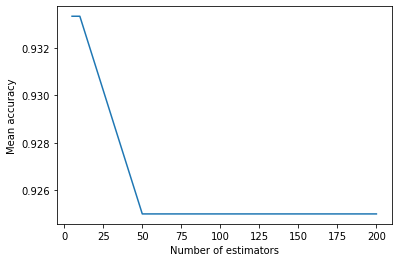

In [16]:
plt.plot(nb_estimators, gradient_tree_boosting_scores)
plt.xlabel('Number of estimators')
plt.ylabel('Mean accuracy')

Gradient Tree Boosting: The best estimator is 5. The mean accuracy is 0.93